# Exploratory Data Analysis

This notebook conducts exploratory data analysis (EDA) on the Mental Health and Diagnosis Dataset, providing insights into distributions, treatment effectiveness and correlations.

## Contents

**_1. Dataset Overview_**  

**_2. Distribution Analysis_**  
- **Diagnosis Distribution**  
- **Gender Distribution**  
- **Age Distribution**  

**_3. Medication and Diagnosis_**  

**_4. Effectiveness of Treatments_**  
  - **Medication Effectiveness**  
  - **Therapy Effectiveness**  

**_5. Correlation Analysis_**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import logging

#Configure Seaborn and Matplotlib settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10.5,5)

#Configure logging settings
logging.basicConfig(
    level=logging.INFO,  # Set logging level (DEBUG, INFO, WARNING, ERROR, CRITICAL)
    format="%(asctime)s - %(levelname)s - %(message)s",  # Define format
    handlers=[
        logging.StreamHandler(),  # Output to console
        logging.FileHandler("app.log")  # Output to a file
    ]
)

#Create logger instance
logger = logging.getLogger(__name__)

## Dataset Overview

**Load and Preview Data:** Load the training,testing and validation datasets.

**Display Dataset Information:** Output the summary information for the datasets such as row counts and column types for each dataset.

In [ ]:
def load_datasets(train_path: str,test_path:str,val_path:str) -> pd.DataFrame:
    """
    Load training, testing and validation datasets from CSV files.

    Parameters:
        train_path (str): File path to the training dataset.
        test_path (str): File path to the test dataset.
        val_path (str): File path to the validation dataset.

    Returns:
        tuple: A tuple containing three Pandas DataFrames (train_df, test_df, val_df).
            Returns None if an error occurs during loading.
    
    """
    
    try:
        # Log the start of the dataset loading process
        logger.info(f"Start loading datasets")

        # Read CSV files into Pandas DataFrammes, setting the first column as the index column
        train_df = pd.read_csv(train_path,index_col=0)
        test_df = pd.read_csv(test_path,index_col=0)
        val_df = pd.read_csv(val_path,index_col=0)

        # Log successful dataset loading
        logger.info(f"Successfully loaded the datasets")

        # Return the three Loaded DataFrames
        return train_df,test_df,val_df
    
    except Exception as e:

        # Log an error message if dataset loading fails
        logger.error(f"Error loading datasets")

        # Return None to indicate failure
        return None

#Load datasets from CSV files
train_df,test_df,val_df = load_datasets('train_dataset.csv','test_dataset.csv','val_dataset.csv')

2025-02-23 18:27:09,060 - INFO - Start loading datasets
2025-02-23 18:27:09,076 - INFO - Successfully loaded the datasets


In [ ]:
# Display summary information about each dataset, including column data types and null values.

# Print information about the training dataset
print("Training Dataset Information:")
print(train_df.info())

# Print information about the testing dataset
print("Testing Dataset Information:")
print(test_df.info())

# Print information about the validation dataset
print("Validation Dataset Information:")
print(val_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 6 to 103
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           350 non-null    int64 
 1   Gender                        350 non-null    object
 2   Diagnosis                     350 non-null    object
 3   Symptom Severity (1-10)       350 non-null    int64 
 4   Mood Score (1-10)             350 non-null    int64 
 5   Sleep Quality (1-10)          350 non-null    int64 
 6   Physical Activity (hrs/week)  350 non-null    int64 
 7   Medication                    350 non-null    object
 8   Therapy Type                  350 non-null    object
 9   Treatment Start Date          350 non-null    object
 10  Treatment Duration (weeks)    350 non-null    int64 
 11  Stress Level (1-10)           350 non-null    int64 
 12  Outcome                       350 non-null    object
 13  Treatment Progress (1-10)

## Distribution Analysis

### Diagnosis Distribution

- Calculate the number of instances of each diagnosis across training, testing and validation datasets.

- Compute the percentage distribution of each diagnosis across the datasets.

- Plot bar graphs to visualise the distribution of each diagnosis in the datasets.

In [ ]:
def diagnosis_distribution(df: pd.DataFrame) -> str:

    """
    Analyse and display the distribution of diagnoses in the dataset.

    This function calculates the count and percentage distribution of different diagnoses within 
    the given DataFrame and prints the results.

    Parameters:
        df (pd.DataFrame): The dataset containing a 'Diagnosis' column.

    Returns:
        None. The function prints the distribution statistics.

    """
    try:
        # Count occurences of each diagnosis
        diagnosis_counts = df['Diagnosis'].value_counts()

        # Calculate the percentage distribution of each diagnosis
        diagnosis_percentages = df['Diagnosis'].value_counts(normalize=True) * 100

        # Print the count of each diagnosis
        print('Diagnosis Distribution')
        print(diagnosis_counts)

        # Print the percentage distribution
        print("\n Percentage Distribution:")
        print(diagnosis_percentages)
    
    except Exception as e:
        # Log an error message if an exception occurs
        logger.error(f"Error computing diagnosis distribution: {str(e)}")



#Display diagnosis distributions for each dataset.
print("\n Training Dataset")
diagnosis_distribution(train_df)

print("\n Testing Dataset")
diagnosis_distribution(test_df)

print("\n Validation Dataset")
diagnosis_distribution(val_df)


 Training Dataset
Diagnosis Distribution
Diagnosis
Anxiety       183
Bipolar        83
Depression     45
Suicidal       39
Name: count, dtype: int64

 Percentage Distribution:
Diagnosis
Anxiety       52.285714
Bipolar       23.714286
Depression    12.857143
Suicidal      11.142857
Name: proportion, dtype: float64

 Testing Dataset
Diagnosis Distribution
Diagnosis
Anxiety       34
Bipolar       23
Suicidal       9
Depression     9
Name: count, dtype: int64

 Percentage Distribution:
Diagnosis
Anxiety       45.333333
Bipolar       30.666667
Suicidal      12.000000
Depression    12.000000
Name: proportion, dtype: float64

 Validation Dataset
Diagnosis Distribution
Diagnosis
Anxiety       34
Bipolar       18
Suicidal      12
Depression    11
Name: count, dtype: int64

 Percentage Distribution:
Diagnosis
Anxiety       45.333333
Bipolar       24.000000
Suicidal      16.000000
Depression    14.666667
Name: proportion, dtype: float64


C:\Users\nifes\AppData\Local\Temp\ipykernel_13580\235303889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Diagnosis",order= df["Diagnosis"].value_counts().index, palette = "coolwarm")


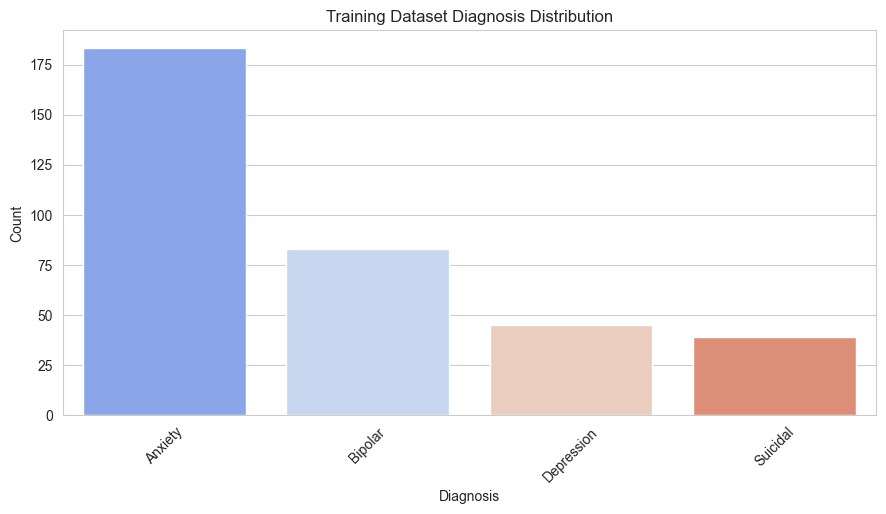

C:\Users\nifes\AppData\Local\Temp\ipykernel_13580\235303889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Diagnosis",order= df["Diagnosis"].value_counts().index, palette = "coolwarm")


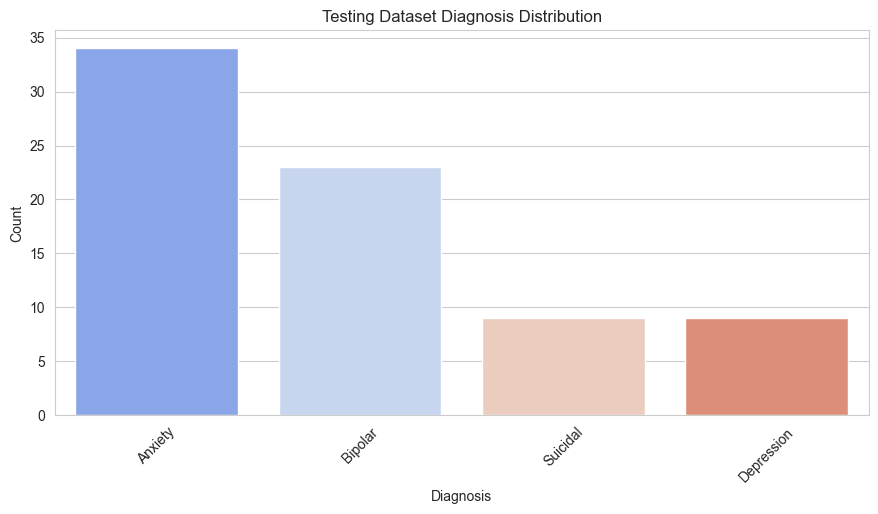

C:\Users\nifes\AppData\Local\Temp\ipykernel_13580\235303889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Diagnosis",order= df["Diagnosis"].value_counts().index, palette = "coolwarm")


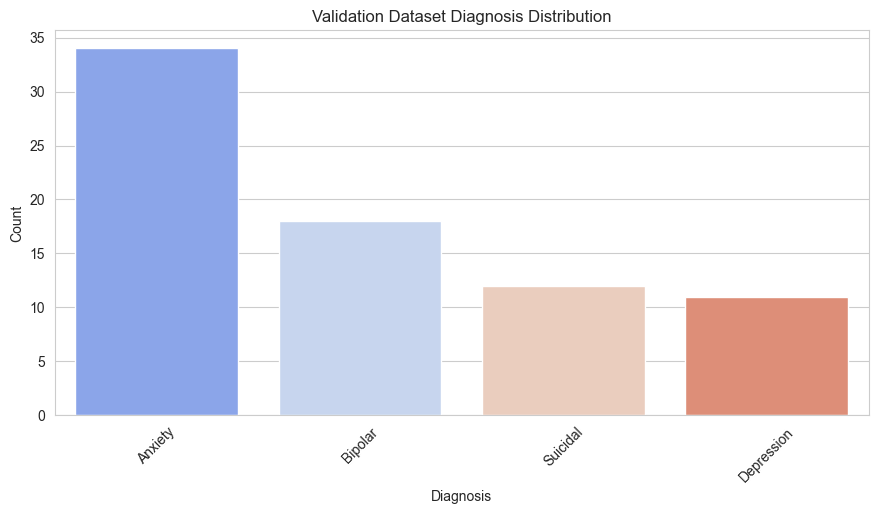

In [ ]:
def diagnosis_visualisation(df: pd.DataFrame, dataset: str) -> None:

    """
    Visualise the distribution of diagnoses in the dataset using a count plot.

    This function creates a bar plot showing the count of each diagnosis category
    in the given dataset.

    Parameters:
        df (pd.DataFrame): The dataset containing a 'Diagnosis' column.
        dataset (str): The name of the dataset (e.g. "Training Dataset") for title labelling.

    Returns:
        None: The function displays the plot.
    
    """

    try:
        # Create a count plot of diagnoses, ordering them be frequency
        sns.countplot(data=df,x="Diagnosis",order= df["Diagnosis"].value_counts().index, palette = "coolwarm")

        # Set plot title and axis labels
        plt.title(f"{dataset} Diagnosis Distribution")
        plt.xlabel("Diagnosis")
        plt.ylabel("Count")

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)
        
        # Display the plot
        plt.show()
    
    except Exception as e:
        # Log an error message if visualisation fails
        logger.error(f'Error visualising diagnosis distribution for {dataset}: {str(e)}')

#Generate visualisations for each dataset
diagnosis_visualisation(train_df,"Training Dataset")
diagnosis_visualisation(test_df,"Testing Dataset")
diagnosis_visualisation(val_df,"Validation Dataset")




### Gender Distribution

- Calculate the number of male and female instances in each dataset.
- Compute the percentage of each gender within each dataset
- Plot bar graphs to visualise gender distribution

C:\Users\nifes\AppData\Local\Temp\ipykernel_13580\4082451491.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Gender",order= df["Gender"].value_counts().index, palette = "coolwarm")



 Training Dataset
Gender Distribution
Gender
Male      190
Female    160
Name: count, dtype: int64

 Percentage Distribution:
Gender
Male      54.285714
Female    45.714286
Name: proportion, dtype: float64

 Testing Dataset
Gender Distribution
Gender
Female    38
Male      37
Name: count, dtype: int64

 Percentage Distribution:
Gender
Female    50.666667
Male      49.333333
Name: proportion, dtype: float64

 Validation Dataset
Gender Distribution
Gender
Male      39
Female    36
Name: count, dtype: int64

 Percentage Distribution:
Gender
Male      52.0
Female    48.0
Name: proportion, dtype: float64


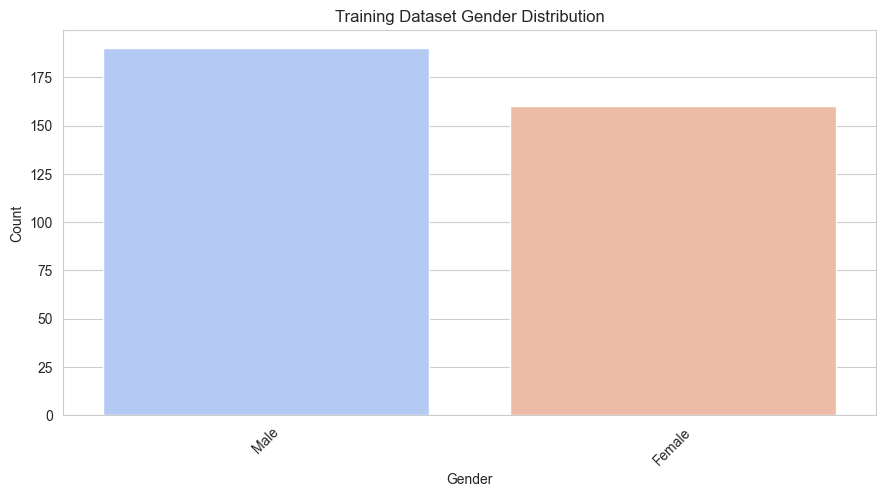

C:\Users\nifes\AppData\Local\Temp\ipykernel_13580\4082451491.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Gender",order= df["Gender"].value_counts().index, palette = "coolwarm")


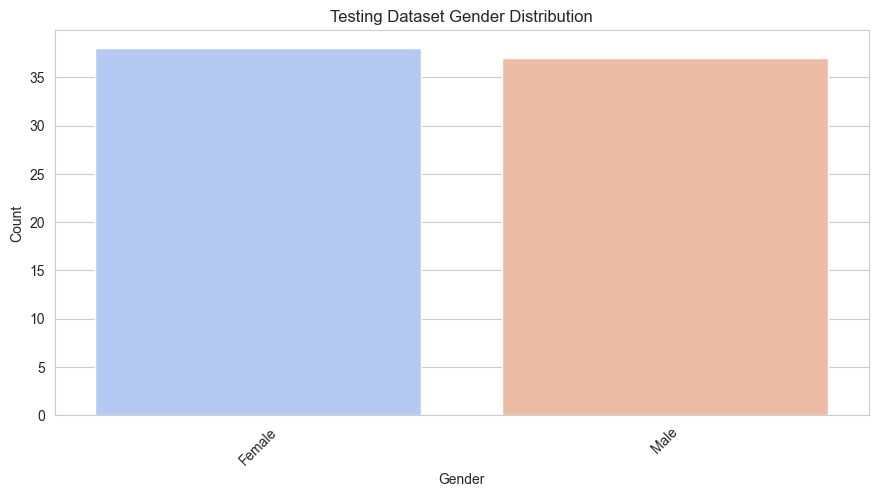

C:\Users\nifes\AppData\Local\Temp\ipykernel_13580\4082451491.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Gender",order= df["Gender"].value_counts().index, palette = "coolwarm")


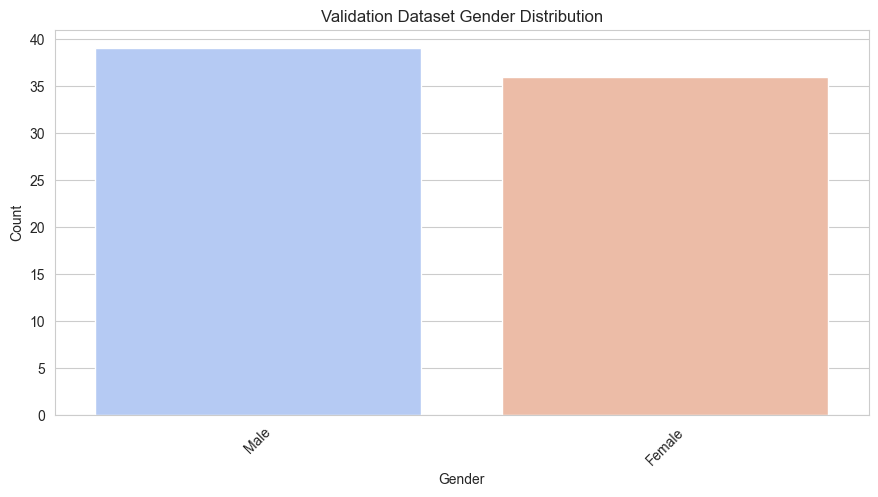

In [ ]:
def gender_distribution(df: pd.DataFrame) -> None:

    """
    Display the distribution of gender in the dataset.

    This function calculates and prints both the count and percentage distributions
    of each gender category present in the dataset.

    Parameters:
        df (pd.DataFrame): The dataset containing a "Gender" column.
    
    Returns:
        None. The function prints the gender distributions statistics. 
    
    """

    try:
        # Count the occurences of each gender in the "Gender" column
        gender_counts = df['Gender'].value_counts()

        # Calculate the percentage distribution of each gender
        gender_percentages = df['Gender'].value_counts(normalize=True) * 100

        # Display the count distribution of genders
        print('Gender Distribution')
        print(gender_counts)

        # Display the percentage distribution of genders
        print("\n Percentage Distribution:")
        print(gender_percentages)
    
    except Exception as e:
        # Log any errors that occur during computation
        logger.error(f"Error computing gender distribution: {str(e)}")


#Prints the gender distribution for each dataset
print("\n Training Dataset")
gender_distribution(train_df)
print("\n Testing Dataset")
gender_distribution(test_df)
print("\n Validation Dataset")
gender_distribution(val_df)

def gender_visualisation(df: pd.DataFrame, dataset: str) -> None:
    """
    Visualise the distribution of gender in the dataset using a count plot.

    This function creates a bar plot showing the count of each gender category in the given
    dataset.

    Parameters:
        df (pd.DataFrame): The dataset containing a 'Gender' column.
        dataset (str): The name of the dataset (e.g. 'Training Dataset') for title labelling.

    Returns:
        None. The function displays the plot.
    
    """

    try:
        # Create a count plot to visualise the gender distribution
        sns.countplot(data=df,x="Gender",order= df["Gender"].value_counts().index, palette = "coolwarm")

        # Set the title, labels and x-axis for the plot
        plt.title(f"{dataset} Gender Distribution")
        plt.xlabel("Gender")
        plt.ylabel("Count")
        plt.xticks(rotation=45)

        # Display the plot
        plt.show()
    
    except Exception as e:
        # Log any errors that occur during visualisation
        logger.error(f"Error visualizing gender distribution for {dataset}: {str(e)}")

#Generate gender distribution visualisations for each dataset
gender_visualisation(train_df,"Training Dataset")
gender_visualisation(test_df,"Testing Dataset")
gender_visualisation(val_df,"Validation Dataset")

### Age Distribution

- Classify ages into the following categories:
    - Young Adults (18-24)
    - Adults (25 -39)
    - Middle Ages (40 -49)
    - Older Adults (50 -60)

- Calculate the number of individuals in each age range for each dataset.
- Compute the percentage of individuals in each age range for each dataset.
- Plot bar graphs to visualise the distribution of age ranges

In [ ]:
def age_distribution(df: pd.DataFrame) -> None:

    """
    Display the distribution of age groups in the datasets.

    This function categorizes individuals into specific age groups and calculates both the count
    and percentage distribution of each group.

    Age groups:
     - Young Adults (18-24)
     - Adults (25-39)
     - Middle-Aged (40-49)
     - Older Adults (50-60)
    
    Parameters:
        df (pd.DataFrame): The dataset containing an 'Age' column.
    
    Returns:
        None. The function prints the age group distribution statistics.
    
    """
    try:
        #Define age bins and labels
        bins = [18,24,39,49,60]

        labels = ["Young Adults (18-24)", "Adults (25-39)", "Middle-Aged (40-49)", "Older Adults (50-60)"]

        #Create a copy of the dataset to avoid modifying the original data
        age_df = df.copy()

        #Categorize ages into defined groups
        age_df['Age Group'] = pd.cut(age_df['Age'],bins=bins,labels=labels,right=True)

        #Compute count and percentage of each age group
        age_counts = age_df['Age Group'].value_counts()

        age_percentages = age_df['Age Group'].value_counts(normalize=True) * 100

        #Print the results
        print('Age Distribution')
        print(age_counts)
        print("\n Percentage Distribution:")
        print(age_percentages)
    
    except Exception as e:
        logger.error(f"Error computing age distribution: {str(e)}")

# Print age distribution for each dataset.
print("\n Training Dataset")
age_distribution(train_df)
print("\n Testing Dataset")
age_distribution(test_df)
print("\n Validation Dataset")
age_distribution(val_df)


 Training Dataset
Age Distribution
Age Group
Adults (25-39)          118
Older Adults (50-60)     88
Middle-Aged (40-49)      75
Young Adults (18-24)     60
Name: count, dtype: int64

 Percentage Distribution:
Age Group
Adults (25-39)          34.604106
Older Adults (50-60)    25.806452
Middle-Aged (40-49)     21.994135
Young Adults (18-24)    17.595308
Name: proportion, dtype: float64

 Testing Dataset
Age Distribution
Age Group
Older Adults (50-60)    21
Adults (25-39)          19
Middle-Aged (40-49)     18
Young Adults (18-24)    15
Name: count, dtype: int64

 Percentage Distribution:
Age Group
Older Adults (50-60)    28.767123
Adults (25-39)          26.027397
Middle-Aged (40-49)     24.657534
Young Adults (18-24)    20.547945
Name: proportion, dtype: float64

 Validation Dataset
Age Distribution
Age Group
Adults (25-39)          31
Older Adults (50-60)    26
Middle-Aged (40-49)     12
Young Adults (18-24)     5
Name: count, dtype: int64

 Percentage Distribution:
Age Group
Adults

C:\Users\nifes\AppData\Local\Temp\ipykernel_13580\2913218397.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=age_df,x="Age Group",order=labels, palette = "coolwarm")


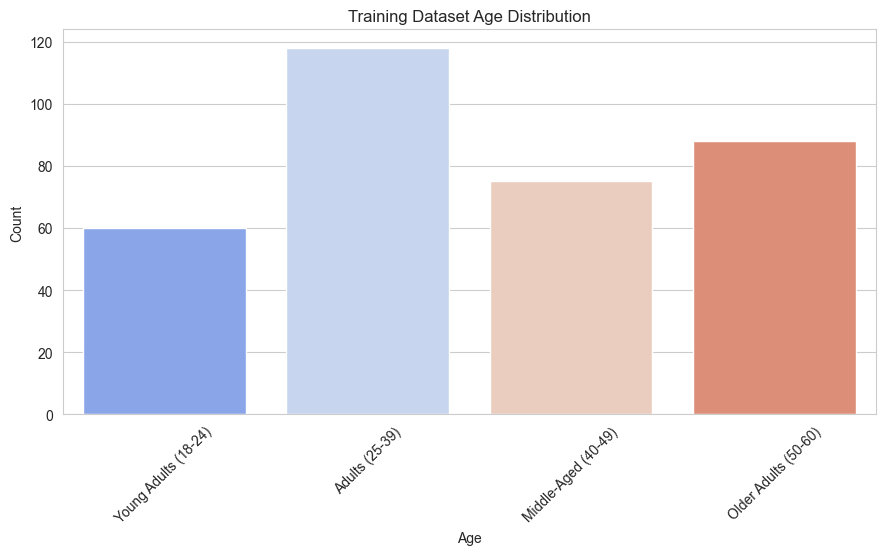

C:\Users\nifes\AppData\Local\Temp\ipykernel_13580\2913218397.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=age_df,x="Age Group",order=labels, palette = "coolwarm")


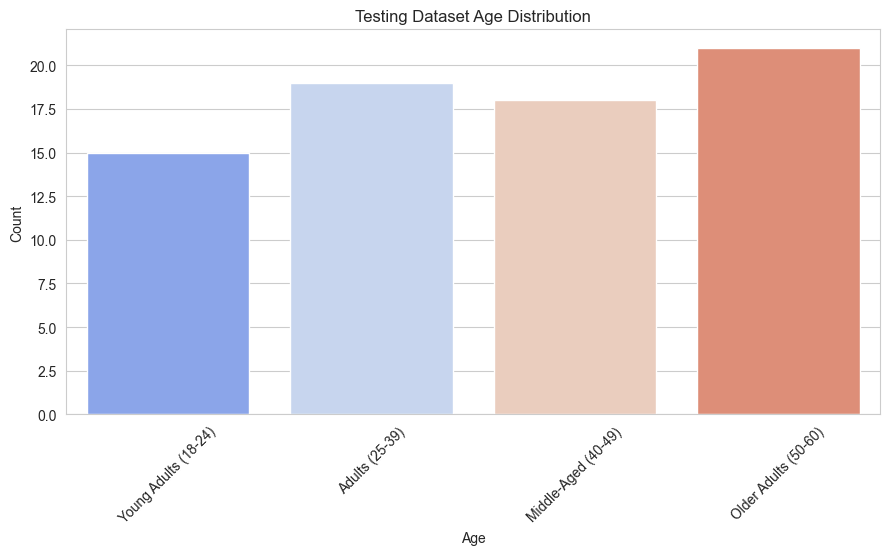

C:\Users\nifes\AppData\Local\Temp\ipykernel_13580\2913218397.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=age_df,x="Age Group",order=labels, palette = "coolwarm")


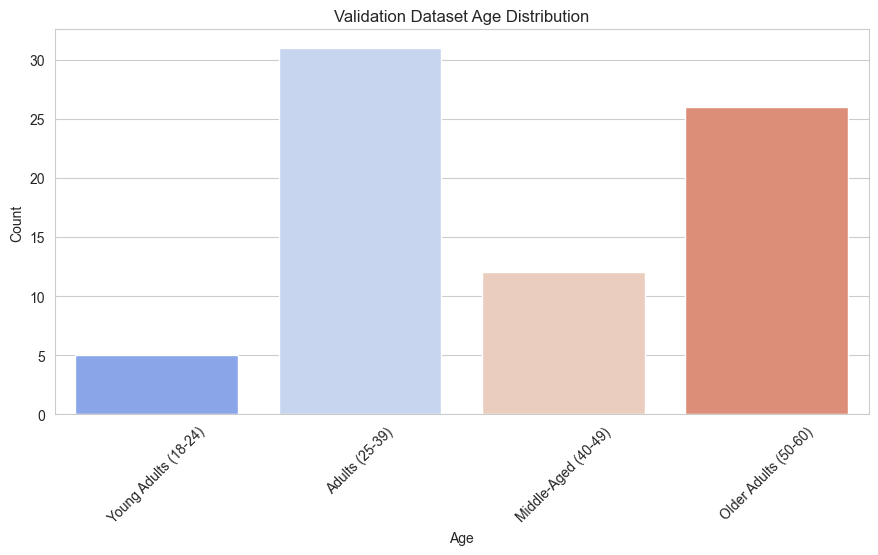

In [ ]:
def age_visualisation(df: pd.DataFrame, dataset:str) -> None:
    """
    Visualise the distribution of age groups in the dataset.

    This function categorizes individuals into specific age groups and generates
    a count plot to show the distribution.

    Age groups:
        - Young Adults (18-24)
        - Adults (25-39)
        - Middle-Aged (40-49)
        - Older Adults (50-60)
    
    Parameters:
        df (pd.DataFrame): The dataset containing an 'Age' column.
        dataset (str): The name of the dataset (e.g. 'Training Dataset') for labelling the plot.
    
    Returns:
        None. The function displays a count plot.
    
    """

    try:
        # Define age bins and labels
        bins = [18,24,39,49,60]

        labels = ["Young Adults (18-24)", "Adults (25-39)", "Middle-Aged (40-49)", "Older Adults (50-60)"]

        # Create a copy of the dataset to avoid modifying the original data
        age_df = df.copy()

        # Categorize ages into defined groups
        age_df['Age Group'] = pd.cut(age_df['Age'],bins=bins,labels=labels,right=True)

        # Create a count plot for age distribution
        sns.countplot(data=age_df,x="Age Group",order=labels, palette = "coolwarm")

        # Set plot labels and formatting
        plt.title(f"{dataset} Age Distribution")
        plt.xlabel("Age")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
    
    except Exception as e:
        logger.error(f"Error computing age distribution: {str(e)}")

age_visualisation(train_df,"Training Dataset")
age_visualisation(test_df,"Testing Dataset")
age_visualisation(val_df,"Validation Dataset")

## Combine Dataset

The training, testing and validation datasets are combined to allow for comprenhensive analysis on the dataset as a whole.

In [ ]:
# Combining training, validation and testing datasets into a single DataFrame
combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

## Medications and Diagnosis

Analyse the medications prescribed for each diagnosis based on the combined dataset.

- Determine the frequency of each medication prescribed for a particular diagnosis
- Plot bar graphs to visualise the frequency of each medication prescribed for a diagnosis

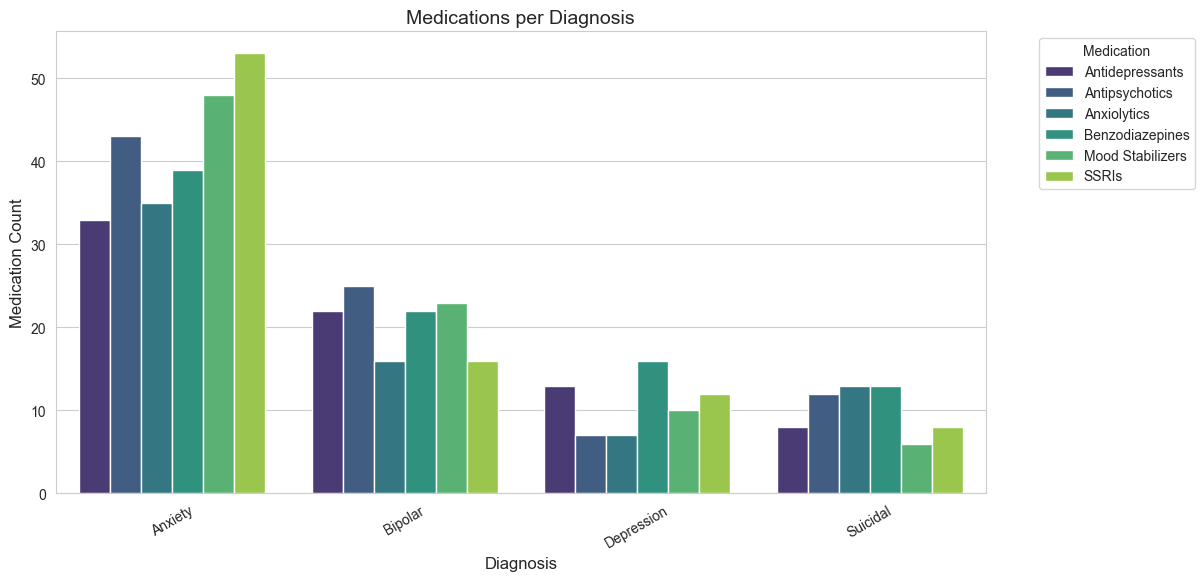

In [ ]:
def medications_per_diagnosis(df:pd.DataFrame) -> None:

    """
    Visualise the distribution of medication prescribed for each diagnosis.

    This function groups the dataset by "Diagnosis" and "Medication" to count how many times
    each medication is prescribed per diagnosis. It then generates a bar plot to visually 
    represent this distribution.

    Parameters:
        df (pd.DataFrame): The dataset containing "Diagnosis" and "Medication" columns.
    
    Returns:
        None. Displays a bar plot showing the count of medications prescribed for each diagnosis.
    
    """

    # Count occurrences of each medication per diagnosis
    medication_counts = df.groupby(["Diagnosis", "Medication"]).size().reset_index(name="Count")

    # Set plot style
    sns.set_style("whitegrid")

    # Create figure and bar plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=medication_counts, x="Diagnosis", y="Count", hue="Medication", palette="viridis")

    # Customise labels and titles
    plt.xlabel("Diagnosis", fontsize=12)
    plt.ylabel("Medication Count", fontsize=12)
    plt.title(f"Medications per Diagnosis", fontsize=14)

    # Move legend outside the plot for better readability
    plt.legend(title="Medication", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Rotate x-axis labels for readability
    plt.xticks(rotation=30)

    #Display the plot
    plt.show()

medications_per_diagnosis(combined_df)




## Effectiveness of Treatments

### Medication Effectivness:

- Convert treatment outcomes (Deteriorated, No Change, Improved) into numerical values.
- Calculate an outcome score for each medication based on its effectiveness.
- Plot a bar graph to show the outcome scores for different medications.

### Therapy Effectiveness:

- Map the therapy outcomes (Deteriorated, No Change, Improved) to numerical values.
- Calculate an outcome score for each therapy type.
- Plot a bar graph to show the outcome scores for different therapy types.

C:\Users\nifes\AppData\Local\Temp\ipykernel_13580\4100158651.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  effectiveness = df.groupby(feature)["Outcome_Score"].mean().reset_index()
C:\Users\nifes\AppData\Local\Temp\ipykernel_13580\4100158651.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=effectiveness, x=feature, y="Outcome_Score", palette="viridis")


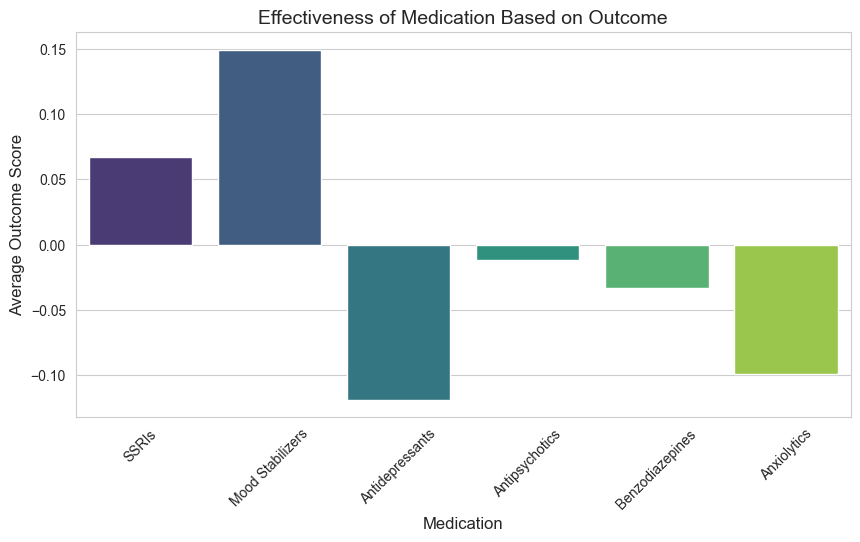

C:\Users\nifes\AppData\Local\Temp\ipykernel_13580\4100158651.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  effectiveness = df.groupby(feature)["Outcome_Score"].mean().reset_index()
C:\Users\nifes\AppData\Local\Temp\ipykernel_13580\4100158651.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=effectiveness, x=feature, y="Outcome_Score", palette="viridis")


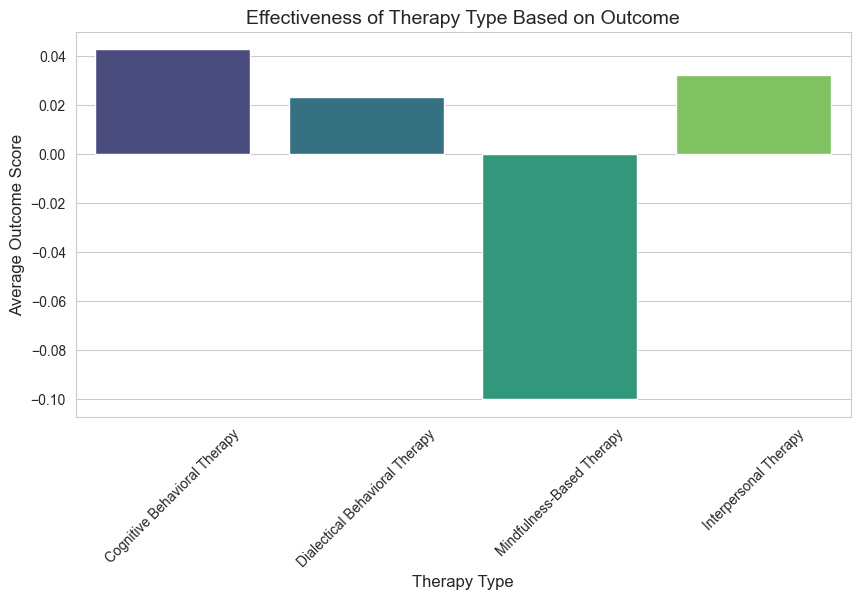

In [ ]:
def effectiveness(df: pd.DataFrame,feature:str,types:list) -> None:
    """
    Analyses the effectiveness of a given feature (e.g. Medication of Therapy Type) based on
    patient outcomes.

    This function maps outcome labels to numerical scores, calculates the average outcome score
    for each category of the speficied feature, and visualises the effectiveness using a bar
    plot.

    Parameters:
        df (pd.DataFrame): The dataset containing patient outcomes and specified feature.
        feature (str): The column name representing the feature to analuyse (e.g. "Medication")
        types (list): An ordered list of categories for the specified feature to ensure meaningful
        comparisons.
    
    Returns:
        None. Displays a bar plot showing the avergae outcome score for each category.
    
    """

    # Mapping outcome labels to numerical scores for analysis
    outcome_mapping = {
        "Deteriorated": -1,
        "No Change": 0,
        "Improved": 1,
    }

    df["Outcome_Score"] = df["Outcome"].map(outcome_mapping)

    # Copying the dataset to prevent modification of the original data
    df = df.copy()

    # Defining the order of feature categories
    order = types

    df[feature] = pd.Categorical(df[feature],categories=order,ordered=True)

    # Calculating the average outcome score for each feature category
    effectiveness = df.groupby(feature)["Outcome_Score"].mean().reset_index()

    effectiveness = effectiveness.sort_values(by="Outcome_Score", ascending=False)

    # Creating a bar plot to visualise the effectiveness of the feature
    plt.figure(figsize=(10, 5))
    sns.barplot(data=effectiveness, x=feature, y="Outcome_Score", palette="viridis")

    # Customising plot labels and title
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Average Outcome Score", fontsize=12)
    plt.title(f"Effectiveness of {feature} Based on Outcome", fontsize=14)

    # Rotating x-axis labels for readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

# Call the function to analyse medication effectiveness
effectiveness(combined_df,"Medication",['SSRIs', 'Mood Stabilizers', 'Antidepressants', 'Antipsychotics',
       'Benzodiazepines', 'Anxiolytics'])

# Call the function to analyse therapy type effectiveness
effectiveness(combined_df,"Therapy Type",['Cognitive Behavioral Therapy','Dialectical Behavioral Therapy',
 'Mindfulness-Based Therapy','Interpersonal Therapy'])

## Correlation Analysis

Compute the correlation between numerical features such as:
- Symptom Severity
- Mood Score
- Sleep Quality
- Stress Level

Analyse how these numerical features correlate with Treatment Progress to identify possible significant relationships.

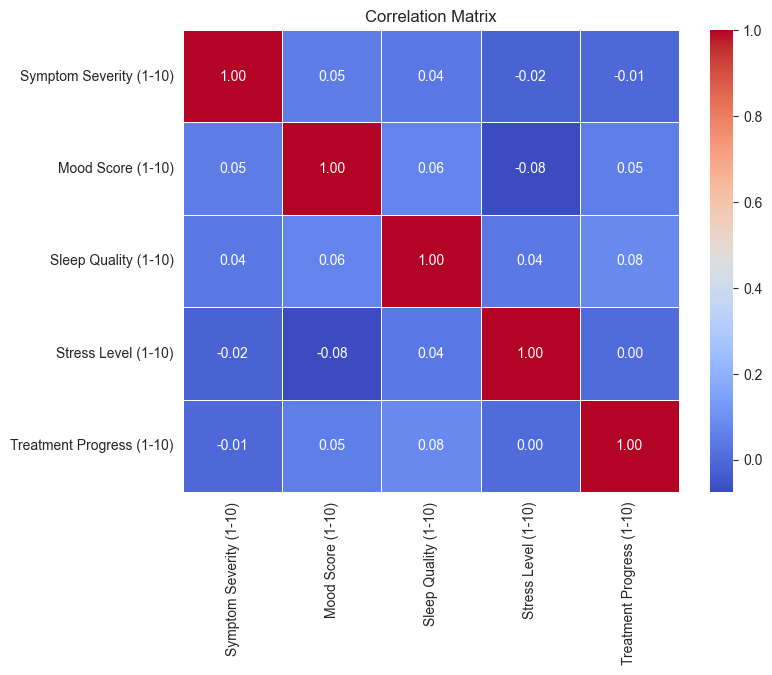

In [ ]:
# Define the selected features for correlation analysis
selected_features = ['Symptom Severity (1-10)', 'Mood Score (1-10)', 'Sleep Quality (1-10)', 'Stress Level (1-10)', 'Treatment Progress (1-10)']

# Compute correlation matrix for the selected features
correlation_matrix = combined_df[selected_features].corr()

# Carete a heatmap to visualise the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set plot title
plt.title("Correlation Matrix")

# Display the heatmap
plt.show()